<a href="https://colab.research.google.com/github/lanyu0322/PUS2020_LYu/blob/master/HW9/Midterm_Lan_HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Important import**

In [ ]:
!pip install geopandas
!pip install sodapy
!pip install census
!pip install CensusData

In [ ]:
!pip install us

In [ ]:
!pip install descartes

In [ ]:

!pip install shapely

In [ ]:
import geopandas as gpd


In [ ]:
import pandas as pd
import numpy as np
import pylab as plt
from sodapy import Socrata


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dara Preparation**

In [ ]:
light = gpd.read_file("/content/drive/My Drive/pus2020_midterm_Lan/Streetlight locations/geo_export_595de76b-f3ad-470c-b7b6-4ca187060af5.shp")
light

,lampa,lampb,lampc,lampd,lampe,lampf,lastplan,postdesc,slid,status,stlid,geometry
0,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198740.0,AsBuilt,SL5552-53,POINT (-118.47789 33.99161)
1,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198741.0,AsBuilt,SL5552-54,POINT (-118.47805 33.99179)
2,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198742.0,AsBuilt,SL5552-55,POINT (-118.47819 33.99195)
3,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198743.0,AsBuilt,SL5552-56,POINT (-118.47832 33.99210)
4,55W LED,55W LED,None,None,None,None,SL7332,25' Ameron Rnd Conc Pole,198744.0,AsBuilt,SL5552-57,POINT (-118.47847 33.99228)
...,...,...,...,...,...,...,...,...,...,...,...,...
217634,107W LED,None,None,None,None,None,P38196,CD953C,237016.0,Energized,P38196-103,POINT (-118.28284 34.00567)
217635,107W LED,None,None,None,None,None,P38196,CD953C,237017.0,Energized,P38196-104,POINT (-118.28258 34.00534)
217636,107W LED,None,None,None,None,None,P38196,Cal Type 19-4-100,237019.0,Energized,P38196-78,POINT (-118.28259 34.00569)
217637,107W LED,None,None,None,None,None,P38196,Cal Type 17-3-100,237018.0,Energized,P38196-69,POINT (-118.28284 34.00531)


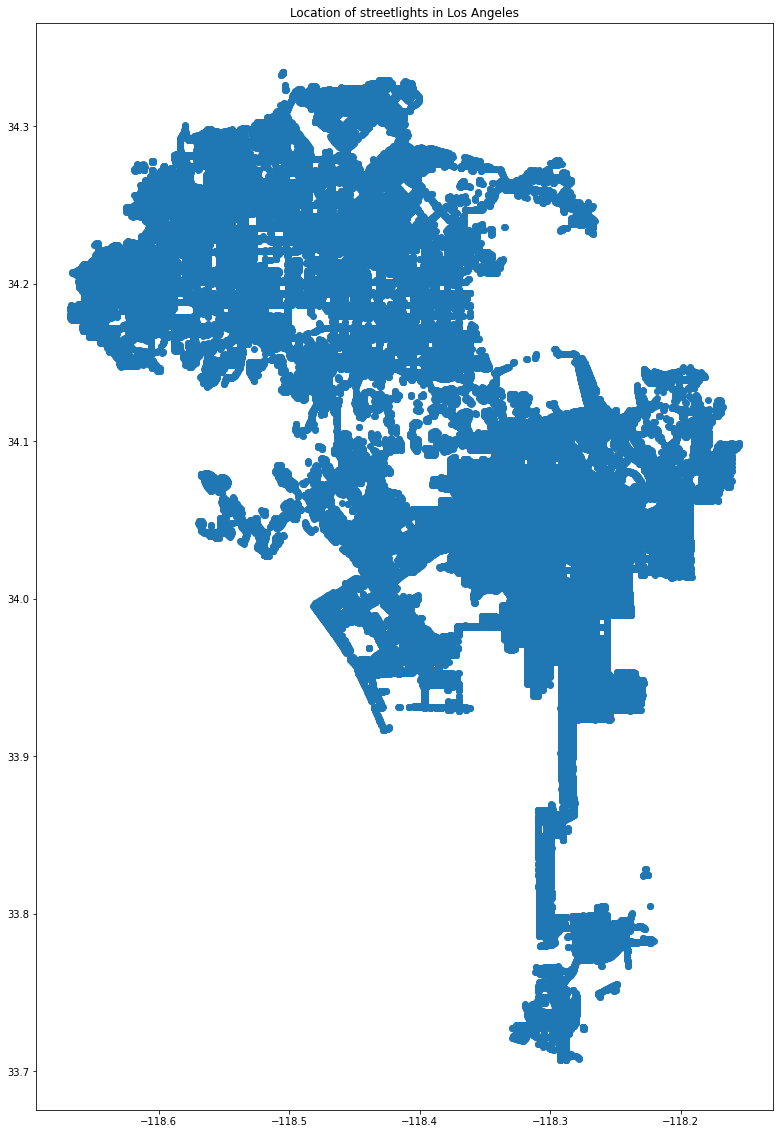

In [ ]:
f, ax = plt.subplots(1, figsize=(20, 20))
light.plot(ax = ax)
plt.title("Location of streetlights in Los Angeles");

In [ ]:
boro = gpd.read_file("https://opendata.arcgis.com/datasets/d6c55385a0e749519f238b77135eafac_0.geojson")
boro["name"].dropna

<bound method Series.dropna of 0             Adams-Normandie
1                      Arleta
2           Arlington Heights
3             Atwater Village
4      Baldwin Hills/Crenshaw
                ...          
109                Wilmington
110            Windsor Square
111                  Winnetka
112            Woodland Hills
113               Lake Balboa
Name: name, Length: 114, dtype: object>

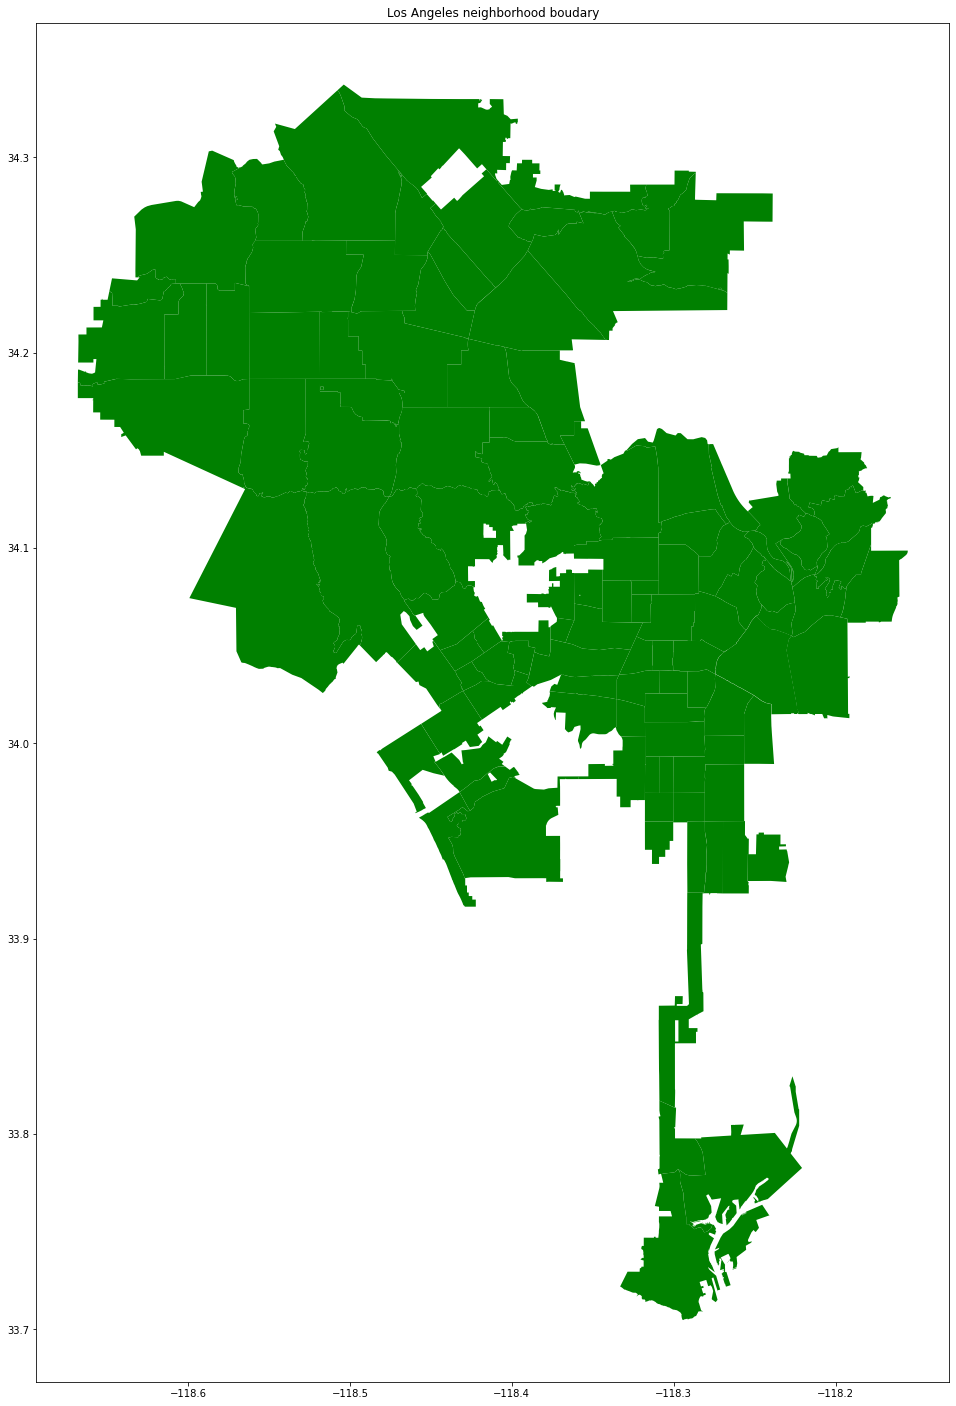

In [ ]:
f, ax = plt.subplots(1, figsize=(25, 25))
boro.plot(ax = ax, color = "green")
plt.title("Los Angeles neighborhood boudary");

In [ ]:
crime = pd.read_csv("https://data.lacity.org/resource/63jg-8b9z.csv")

In [ ]:
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)



#results = client.get("63jg-8b9z", where = "date_rptd > '2019-01-01T00:00:00.000'"'", limit = 20000 )

results = client.get("63jg-8b9z", where = "'2018-01-01T00:00:00.000'< date_rptd", limit = 300000)
                     

# Convert to pandas DataFrame

crime = pd.DataFrame.from_records(results)

In [ ]:
crime2018 = crime[crime["date_rptd"] < '2019-01-01T00:00:00.000']

In [ ]:
crime2018

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,180404092,2018-01-02T00:00:00.000,2018-01-01T00:00:00.000,2200,04,Hollenbeck,0459,1,330,BURGLARY FROM VEHICLE,0344 1302 0377,53,M,H,102,SIDEWALK,IC,Invest Cont,330,3100 BLANCHARD ST,34.0477,-118.1963,NaN,NaN,NaN,NaN,NaN,NaN
1,180700512,2018-01-02T00:00:00.000,2018-01-02T00:00:00.000,0800,07,Wilshire,0753,1,310,BURGLARY,1606 0344,24,M,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,310,1300 S OGDEN DR,34.053,-118.3637,NaN,NaN,NaN,NaN,NaN,NaN
2,180505526,2018-01-02T00:00:00.000,2018-01-02T00:00:00.000,1700,05,Harbor,0555,2,901,VIOLATION OF RESTRAINING ORDER,0358 0561 0913 1242 2004,74,F,H,501,SINGLE FAMILY DWELLING,AO,Adult Other,901,600 W SANTA CRUZ ST,33.7442,-118.2901,NaN,NaN,NaN,NaN,NaN,NaN
3,180200505,2018-01-02T00:00:00.000,2018-01-02T00:00:00.000,1930,02,Rampart,0275,1,310,BURGLARY,1607 0344 1402,0,X,X,203,OTHER BUSINESS,IC,Invest Cont,310,1700 W OLYMPIC BL,34.0498,-118.2754,998,NaN,NaN,NaN,NaN,NaN
4,181304104,2018-01-02T00:00:00.000,2018-01-02T00:00:00.000,1720,13,Newton,1361,2,624,BATTERY - SIMPLE ASSAULT,0605 0446 0416,51,F,H,101,STREET,AA,Adult Arrest,624,49TH ST,33.9983,-118.2783,NaN,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",BROADWAY,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230116,180225400,2018-12-31T00:00:00.000,2018-12-31T00:00:00.000,0630,02,Rampart,0269,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,2002 1206 0416 0446 0401 1813 1814 2000,46,M,H,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",AO,Adult Other,626,1500 W 8TH ST,34.0511,-118.2707,NaN,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN,NaN
230117,181230275,2018-12-31T00:00:00.000,2018-12-31T00:00:00.000,1300,12,77th Street,1233,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0450 0906,36,X,X,101,STREET,IC,Invest Cont,230,62ND,33.9834,-118.3095,NaN,106,UNKNOWN FIREARM,MANHATTAN,NaN,NaN
230118,180520334,2018-12-31T00:00:00.000,2018-12-31T00:00:00.000,0130,05,Harbor,0529,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0326 0906 1312 0112 0302 0430 1309 1310 1407 1100,27,M,H,101,STREET,IC,Invest Cont,230,LECOUVREUR AV,33.7772,-118.2557,998,102,HAND GUN,E ST,NaN,NaN
230119,191804001,2018-12-31T00:00:00.000,2018-12-31T00:00:00.000,1150,18,Southeast,1827,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,1822 0421 0340,48,M,H,101,STREET,IC,Invest Cont,930,97TH ST,33.9482,-118.2408,NaN,511,VERBAL THREAT,HOLMES AV,NaN,NaN


In [ ]:
crime2018["lat"].dropna

<bound method Series.dropna of 0         34.0477
1          34.053
2         33.7442
3         34.0498
4         33.9983
           ...   
230116    34.0511
230117    33.9834
230118    33.7772
230119    33.9482
230120    34.0981
Name: lat, Length: 230121, dtype: object>

In [ ]:
county = gpd.read_file("https://opendata.arcgis.com/datasets/71b2fed2c1f24fc8850f5b7f8d2a320a_26.geojson")

<bound method GeoDataFrame.plot of      OBJECTID  ...                                           geometry
0           1  ...  POLYGON ((-118.24338 33.98924, -118.24348 33.9...
1           2  ...  POLYGON ((-118.23431 33.96101, -118.23442 33.9...
2           3  ...  POLYGON ((-118.28285 33.97597, -118.28285 33.9...
3           4  ...  POLYGON ((-118.28410 34.08349, -118.28438 34.0...
4           5  ...  MULTIPOLYGON (((-118.33652 34.06190, -118.3367...
..        ...  ...                                                ...
306       307  ...  POLYGON ((-117.98740 34.66074, -117.98780 34.6...
307       308  ...  POLYGON ((-117.88784 34.53628, -117.89155 34.5...
308       309  ...  POLYGON ((-117.86059 34.47349, -117.86169 34.4...
309       310  ...  POLYGON ((-117.92409 34.66075, -117.92428 34.6...
310       311  ...  MULTIPOLYGON (((-118.60584 33.47885, -118.6058...

[311 rows x 6 columns]>

In [ ]:
demo = gpd.read_file("https://opendata.arcgis.com/datasets/2f11013d1302419aac243d6e1c56568f_0.geojson")
demo

,FID,OBJECTID,NAME,WADDRESS,DWEBSITE,DEMAIL,DPHONE,NC_ID,CERTIFIED,TOOLTIP,NLA_URL,SERVICE_RE,NC_IDstr,nc_area,NC_IDstr_1,tot_pop,white,black,native,asian,PI,other,twoplus,nohisl,hislat,male,male_under,male5to9,male10to14,male15to17,male18to19,male20,male21,male22to24,male25to29,male30to34,male35to39,male40to44,male45to49,male50to54,male55to59,male60to61,male62to64,male65to66,male67to69,male70to74,male75to79,male80to84,male85up,female,femunder5,fem5to9,fem10to14,fem15to17,fem18and19,fem20,fem21,fem22to24,fem25to29,fem30to34,fem35to39,fem40to44,fem45to49,fem50to54,fem55to59,fem60and61,fem62to64,fem65and66,fem67to69,fem70to74,fem75to79,fem80to84,fem85andup,Shape__Area,Shape__Length,density,geometry
0,1,1,LINCOLN HEIGHTS NC,http://www.lincolnheightsnc.org/,http://empowerla.org/LHNC,LHNC@EmpowerLA.org,213-978-1551,47,2002-04-27T00:00:00+00:00,LINCOLN HEIGHTS NC,navigatela/reports/nc_reports.cfm?id=47,REGION 8 - NORTH EAST LA,47,3.172536,47,31664.502089,11923.827118,520.159756,215.185572,7262.629799,40.936130,11085.677478,616.086069,9681.614840,21982.886923,16078.064584,1112.931075,1030.183672,1141.310089,1063.608009,583.999581,269.092710,351.277646,715.547172,1508.085303,1038.629564,965.644480,1234.453455,1092.625133,1038.722630,860.259694,225.192276,308.020275,202.206480,268.280967,337.536846,335.728337,183.811079,210.918153,15586.437256,1100.241613,871.773860,938.411540,880.972496,444.781522,285.348619,124.976061,815.179062,1164.843706,904.673095,931.296618,1094.342003,1171.134670,1012.354899,937.407778,265.722575,395.792622,222.429698,338.254631,515.206346,304.881477,360.420195,505.992163,1.201119e+07,16908.925514,9980.816930,"POLYGON ((-118.20505 34.05559, -118.20607 34.0..."
1,2,2,VOICES OF 90037,,http://empowerla.org/VOICESOF90037,V9NC@EmpowerLA.org,213-978-1551,109,2008-06-16T00:00:00+00:00,VOICES OF 90037,navigatela/reports/nc_reports.cfm?id=109,REGION 9 - SOUTH LA 2,109,2.179819,109,45411.965401,12493.849616,9845.644917,208.141397,445.533132,0.123527,21523.453772,895.219101,11201.306767,34210.658711,22209.478060,1914.411158,1823.508872,1897.141740,1069.487726,652.076176,563.568579,418.609665,1036.819061,2150.944512,1660.458094,1583.840445,1401.455880,1364.882550,1469.161490,1041.407566,348.255974,374.254118,302.167085,223.336977,287.611011,265.342772,151.521145,209.215467,23202.487449,2022.435764,1759.338310,1631.204489,1077.994871,693.242497,542.708078,300.553229,1321.384260,1820.891144,1791.344123,1686.853516,1390.696839,1393.263605,1588.580471,996.391623,413.732018,533.828262,325.061576,341.685138,536.505144,363.098659,360.361154,311.332661,8.238136e+06,12046.586185,20832.907510,"POLYGON ((-118.28276 34.01115, -118.28236 34.0..."
2,3,3,LOS FELIZ NC,http://www.losfeliznc.org/,http://empowerla.org/LFNC,LFNC@EmpowerLA.org,213-978-1551,36,2002-06-11T00:00:00+00:00,LOS FELIZ NC,navigatela/reports/nc_reports.cfm?id=36,REGION 7 - EAST,36,9.144726,36,34987.197985,24900.515437,903.511555,28.732203,4335.169880,44.447045,3207.839647,1566.982338,29220.454187,5766.743768,17359.615601,950.436432,542.167413,727.125282,253.390779,203.965656,89.917034,88.775980,410.699099,2407.074777,2357.049582,1804.211839,1460.362082,1351.135806,1064.237373,718.348086,258.451572,743.233538,292.521855,387.483364,461.879440,298.585227,214.959603,273.603678,17627.582384,776.492129,489.378126,299.727744,149.138003,171.172686,130.259640,63.226889,704.466866,2822.172091,2391.753771,1496.898343,1261.249548,1255.558517,1088.840183,835.064822,510.555658,520.249946,395.856646,338.388462,604.176829,435.200193,473.136801,414.618610,3.466653e+07,38319.506378,3825.942566,"POLYGON ((-118.30030 34.15794, -118.29885 34.1..."
3,4,4,MISSION HILLS NC,http://mhnconline.org/,http://empowerla.org/MHNC,MHNC@EmpowerLA.org,213-978-1551,101,2005-04-19T00:00:00+00:00,MISSION HILLS NC,navigatela/reports/nc_reports.cfm?id=101,REGION 1 - NORTH EAST VALLEY,101,3.595233,101,22966.483991,13519.492338,393.986586,143.472993,1977.126747,0.921043,6204.393302,727.091070,6084.822069,16881.

In [ ]:
geometry = demo.geometry.to_crs(epsg=6423)
area = geometry.area
demo["popdensity"] = demo["tot_pop"]/area
demo

,FID,OBJECTID,NAME,WADDRESS,DWEBSITE,DEMAIL,DPHONE,NC_ID,CERTIFIED,TOOLTIP,NLA_URL,SERVICE_RE,NC_IDstr,nc_area,NC_IDstr_1,tot_pop,white,black,native,asian,PI,other,twoplus,nohisl,hislat,male,male_under,male5to9,male10to14,male15to17,male18to19,male20,male21,male22to24,male25to29,male30to34,male35to39,male40to44,male45to49,male50to54,male55to59,male60to61,male62to64,male65to66,male67to69,male70to74,male75to79,male80to84,male85up,female,femunder5,fem5to9,fem10to14,fem15to17,fem18and19,fem20,fem21,fem22to24,fem25to29,fem30to34,fem35to39,fem40to44,fem45to49,fem50to54,fem55to59,fem60and61,fem62to64,fem65and66,fem67to69,fem70to74,fem75to79,fem80to84,fem85andup,Shape__Area,Shape__Length,density,geometry,popdensity
0,1,1,LINCOLN HEIGHTS NC,http://www.lincolnheightsnc.org/,http://empowerla.org/LHNC,LHNC@EmpowerLA.org,213-978-1551,47,2002-04-27T00:00:00+00:00,LINCOLN HEIGHTS NC,navigatela/reports/nc_reports.cfm?id=47,REGION 8 - NORTH EAST LA,47,3.172536,47,31664.502089,11923.827118,520.159756,215.185572,7262.629799,40.936130,11085.677478,616.086069,9681.614840,21982.886923,16078.064584,1112.931075,1030.183672,1141.310089,1063.608009,583.999581,269.092710,351.277646,715.547172,1508.085303,1038.629564,965.644480,1234.453455,1092.625133,1038.722630,860.259694,225.192276,308.020275,202.206480,268.280967,337.536846,335.728337,183.811079,210.918153,15586.437256,1100.241613,871.773860,938.411540,880.972496,444.781522,285.348619,124.976061,815.179062,1164.843706,904.673095,931.296618,1094.342003,1171.134670,1012.354899,937.407778,265.722575,395.792622,222.429698,338.254631,515.206346,304.881477,360.420195,505.992163,1.201119e+07,16908.925514,9980.816930,"POLYGON ((-118.20505 34.05559, -118.20607 34.0...",0.003852
1,2,2,VOICES OF 90037,,http://empowerla.org/VOICESOF90037,V9NC@EmpowerLA.org,213-978-1551,109,2008-06-16T00:00:00+00:00,VOICES OF 90037,navigatela/reports/nc_reports.cfm?id=109,REGION 9 - SOUTH LA 2,109,2.179819,109,45411.965401,12493.849616,9845.644917,208.141397,445.533132,0.123527,21523.453772,895.219101,11201.306767,34210.658711,22209.478060,1914.411158,1823.508872,1897.141740,1069.487726,652.076176,563.568579,418.609665,1036.819061,2150.944512,1660.458094,1583.840445,1401.455880,1364.882550,1469.161490,1041.407566,348.255974,374.254118,302.167085,223.336977,287.611011,265.342772,151.521145,209.215467,23202.487449,2022.435764,1759.338310,1631.204489,1077.994871,693.242497,542.708078,300.553229,1321.384260,1820.891144,1791.344123,1686.853516,1390.696839,1393.263605,1588.580471,996.391623,413.732018,533.828262,325.061576,341.685138,536.505144,363.098659,360.361154,311.332661,8.238136e+06,12046.586185,20832.907510,"POLYGON ((-118.28276 34.01115, -118.28236 34.0...",0.008040
2,3,3,LOS FELIZ NC,http://www.losfeliznc.org/,http://empowerla.org/LFNC,LFNC@EmpowerLA.org,213-978-1551,36,2002-06-11T00:00:00+00:00,LOS FELIZ NC,navigatela/reports/nc_reports.cfm?id=36,REGION 7 - EAST,36,9.144726,36,34987.197985,24900.515437,903.511555,28.732203,4335.169880,44.447045,3207.839647,1566.982338,29220.454187,5766.743768,17359.615601,950.436432,542.167413,727.125282,253.390779,203.965656,89.917034,88.775980,410.699099,2407.074777,2357.049582,1804.211839,1460.362082,1351.135806,1064.237373,718.348086,258.451572,743.233538,292.521855,387.483364,461.879440,298.585227,214.959603,273.603678,17627.582384,776.492129,489.378126,299.727744,149.138003,171.172686,130.259640,63.226889,704.466866,2822.172091,2391.753771,1496.898343,1261.249548,1255.558517,1088.840183,835.064822,510.555658,520.249946,395.856646,338.388462,604.176829,435.200193,473.136801,414.618610,3.466653e+07,38319.506378,3825.942566,"POLYGON ((-118.30030 34.15794, -118.29885 34.1...",0.001477
3,4,4,MISSION HILLS NC,http://mhnconline.org/,http://empowerla.org/MHNC,MHNC@EmpowerLA.org,213-978-1551,101,2005-04-19T00:00:00+00:00,MISSION HILLS NC,navigatela/reports/nc_reports.cfm?id=101,REGION 1 - NORTH EAST VALLEY,101,3.595233,101,22966.483991,13519.492338,393.986586,143.472993,1977.126747,0.921043,620

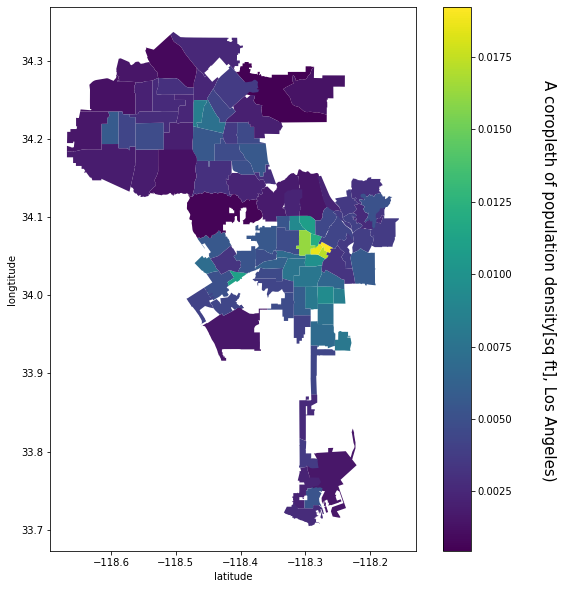

In [ ]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
demo.plot("popdensity", legend=True, ax=ax)
ax.set_xlabel("latitude")
ax.set_ylabel("longtitude")

fig.text(0.93, 0.5, "A coropleth of population density[sq ft], Los Angeles)", ha="center", 
      va="center", rotation=-90, fontsize=15)
fig.show()

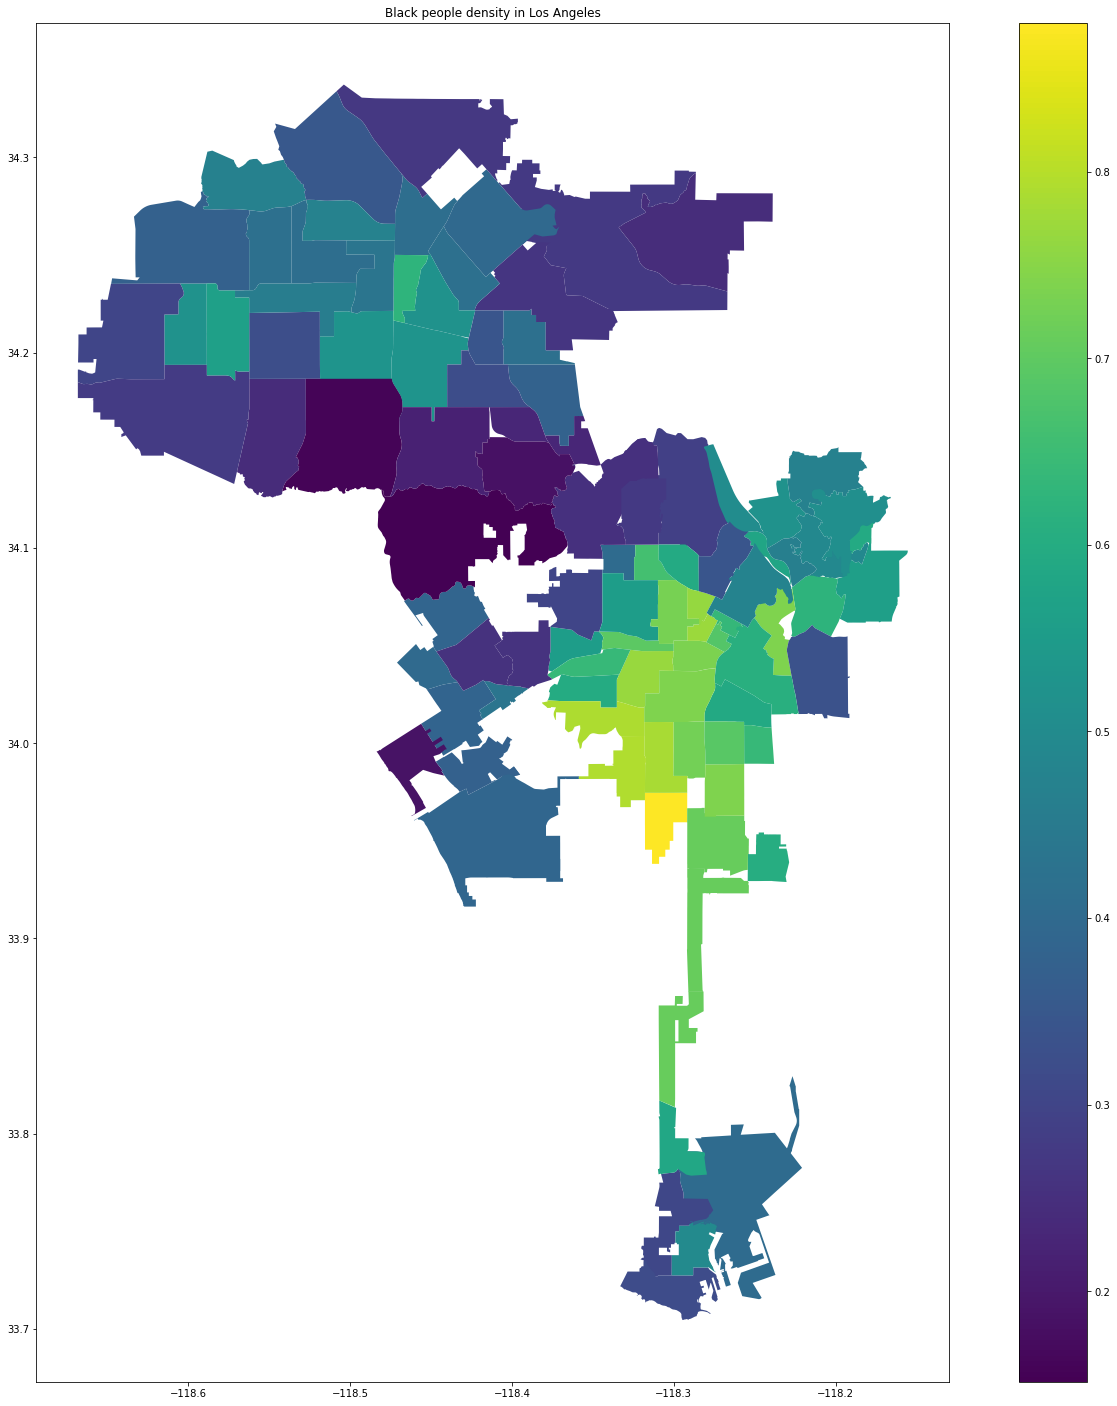

In [ ]:
demo["nonwhite_density"] = 1- demo["white"]/demo["tot_pop"]
f, ax = plt.subplots(1, figsize=(25, 25))
demo.plot("nonwhite_density", ax = ax, legend = True)
plt.title("Black people density in Los Angeles");

In [ ]:
demo["bdensity"] = demo["black"]/demo["tot_pop"]

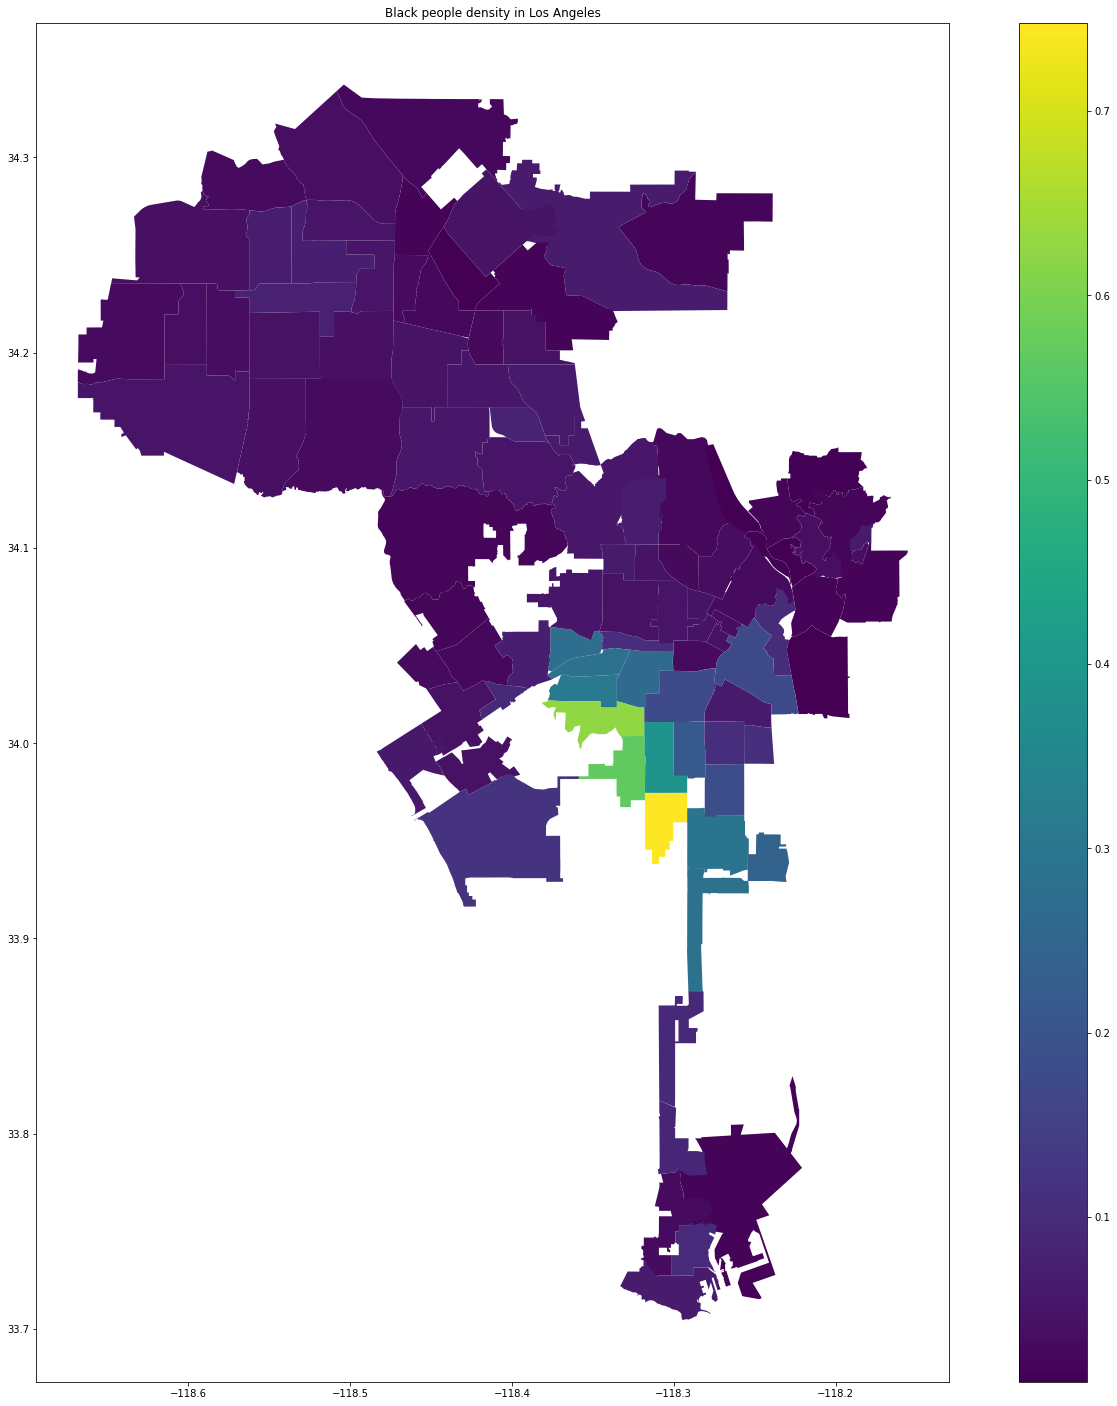

In [ ]:
f, ax = plt.subplots(1, figsize=(25, 25))
demo.plot("bdensity", ax = ax, legend = True)
plt.title("Black people density in Los Angeles");

In [ ]:
myAPIkey =  pd.read_csv("/content/drive/My Drive/myapis.csv")["census"]

In [ ]:
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)


# **Education**

In [ ]:
censusdata.search('acs5', 2018, 'concept', 'education')

[('B06009PR_001E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total'),
 ('B06009PR_002E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total!!Less than high school graduate'),
 ('B06009PR_003E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total!!High school graduate (includes equivalency)'),
 ('B06009PR_004E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  "Estimate!!Total!!Some college or associate's degree"),
 ('B06009PR_005E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  "Estimate!!Total!!Bachelor's degree"),
 ('B06009PR_006E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total!!Graduate or professional degree'),
 ('B06009PR_007E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total!!Born in Puerto Rico'),
 ('B06009PR_008E',
  'PLACE OF BIRTH BY EDUCATIONAL ATTAINMENT IN PUERTO RICO',
  'Estimate!!Total!!

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B15003'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15003_001E  | EDUCATIONAL ATTAINMENT FOR THE | !! Estimate Total                                        | int  
B15003_002E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total No schooling completed              | int  
B15003_003E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total Nursery school                      | int  
B15003_004E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total Kindergarten                        | int  
B15003_005E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total 1st grade                           | int  
B15003_006E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total 2nd grade                           | int  
B15003_007E  | EDUCATIONAL ATTAINMENT FOR THE | !! !! Estimate Total 3rd grade               

In [ ]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [ ]:

education022 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_022E"])
education023 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_023E"])
education024 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_024E"])
education025 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_025E"])

In [ ]:
education_college = education022.merge(education023, left_on=education022.index, right_on=education023.index)
education = education024.merge(education025, left_on=education024.index, right_on=education025.index)
education_all = education_college.merge(education, left_on=education_college.index, right_on=education.index)


In [ ]:
education_all["total"] = education_all["B15003_022E"]+education_all["B15003_023E"]+education_all["B15003_024E"]+education_all["B15003_025E"]

In [ ]:
def gettract(cname):
  return cname.split(':')[-1]

In [ ]:
education_all

,key_0,key_0_x,B15003_022E,B15003_023E,key_0_y,B15003_024E,B15003_025E,total
0,0,"Census Tract 5433.21, Los Angeles County, Cali...",644,629,"Census Tract 5433.21, Los Angeles County, Cali...",63,65,1401
1,1,"Census Tract 5435.02, Los Angeles County, Cali...",570,157,"Census Tract 5435.02, Los Angeles County, Cali...",36,0,763
2,2,"Census Tract 5501, Los Angeles County, Califor...",708,266,"Census Tract 5501, Los Angeles County, Califor...",17,38,1029
3,3,"Census Tract 5505, Los Angeles County, Califor...",1038,490,"Census Tract 5505, Los Angeles County, Califor...",80,0,1608
4,4,"Census Tract 5510, Los Angeles County, Califor...",917,403,"Census Tract 5510, Los Angeles County, Califor...",108,0,1428
...,...,...,...,...,...,...,...,...
2341,2341,"Census Tract 6040.01, Los Angeles County, Cali...",420,127,"Census Tract 6040.01, Los Angeles County, Cali...",21,0,568
2342,2342,"Census Tract 6040.02, Los Angeles County, Cali...",517,175,"Census Tract 6040.02, Los Angeles County, Cali...",34,0,726
2343,2343,"Census Tract 6203.05, Los Angeles County, Cali...",1969,814,"Census Tract 6203.05, Los Angeles County, Cali...",337,131,3251
2344,2344,"Census Tract 6209.04, Los Angeles County, Cali...",864,538,"Census Tract 6209.04, Los Angeles County, Cali...",209,55,1666


In [ ]:
education_all["tract"] = education_all["key_0_x"].astype(str).map(gettract)

In [ ]:
education_all = education_all[["total", "tract"]]

In [ ]:
education_all

,total,tract
0,1401,543321
1,763,543502
2,1029,550100
3,1608,550500
4,1428,551000
...,...,...
2341,568,604001
2342,726,604002
2343,3251,620305
2344,1666,620904


In [ ]:
!wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_06_tract.zip

--2020-11-10 04:51:11--  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_06_tract.zip
Resolving www2.census.gov (www2.census.gov)... 104.111.228.115, 2a02:26f0:7b:9b7::208c, 2a02:26f0:7b:9b1::208c
Connecting to www2.census.gov (www2.census.gov)|104.111.228.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2018_06_tract.zip’

tl_2018_06_tract.zi     [     <=>            ]  27.97M  18.2MB/s    in 1.5s    

2020-11-10 04:51:13 (18.2 MB/s) - ‘tl_2018_06_tract.zip’ saved [29332752]



In [ ]:
!unzip tl_2018_06_tract.zip

Archive:  tl_2018_06_tract.zip
 extracting: tl_2018_06_tract.cpg    
  inflating: tl_2018_06_tract.dbf    
  inflating: tl_2018_06_tract.prj    
  inflating: tl_2018_06_tract.shp    
  inflating: tl_2018_06_tract.shp.ea.iso.xml  
  inflating: tl_2018_06_tract.shp.iso.xml  
  inflating: tl_2018_06_tract.shx    


In [ ]:
gla18 = gpd.GeoDataFrame.from_file("tl_2018_06_tract.shp")

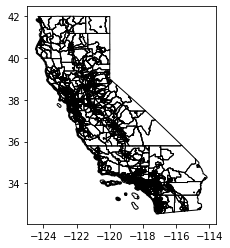

In [ ]:
gla18.plot(color="None", edgecolor='k')

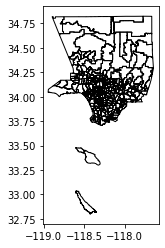

In [ ]:
county["geometry"].plot(color="None", edgecolor='k')

In [ ]:
gla18.head()
gla18

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,137504,06037137504,1375.04,Census Tract 1375.04,G5020,S,3837562,0,+34.1480383,-118.5720594,"POLYGON ((-118.58119 34.14318, -118.58099 34.1..."
1,06,037,138000,06037138000,1380,Census Tract 1380,G5020,S,4472196,0,+34.1488008,-118.5910495,"POLYGON ((-118.60573 34.14585, -118.60561 34.1..."
2,06,037,139200,06037139200,1392,Census Tract 1392,G5020,S,1152031,0,+34.1756961,-118.5246447,"POLYGON ((-118.53082 34.18024, -118.52952 34.1..."
3,06,067,002300,06067002300,23,Census Tract 23,G5020,S,1213095,0,+38.5571708,-121.4938311,"POLYGON ((-121.50218 38.55643, -121.50184 38.5..."
4,06,067,002400,06067002400,24,Census Tract 24,G5020,S,3224718,0,+38.5448312,-121.4973382,"POLYGON ((-121.50970 38.54070, -121.50960 38.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,06,059,001303,06059001303,13.03,Census Tract 13.03,G5020,S,1179651,0,+33.9209014,-117.9511671,"POLYGON ((-117.95917 33.92458, -117.95888 33.9..."
8053,06,059,001304,06059001304,13.04,Census Tract 13.04,G5020,S,1252716,0,+33.9244375,-117.9455411,"POLYGON ((-117.95918 33.92820, -117.95831 33.9..."
8054,06,059,001401,06059001401,14.01,Census Tract 14.01,G5020,S,1592982,15869,+33.9408240,-117.9410039,"POLYGON ((-117.95056 33.94503, -117.95055 33.9..."
8055,06,013,367200,06013367200,3672,Census Tract 3672,G5020,S,1322081,0,+37.9660279,-122.3355504,"POLYGON ((-122.34551 37.96355, -122.34550 37.9..."


In [ ]:
egla18 = gla18.merge(education_all, left_on = "TRACTCE", right_on = "tract")


In [ ]:
egla18 

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,total,tract
0,06,037,137504,06037137504,1375.04,Census Tract 1375.04,G5020,S,3837562,0,+34.1480383,-118.5720594,"POLYGON ((-118.58119 34.14318, -118.58099 34.1...",844,137504
1,06,037,138000,06037138000,1380,Census Tract 1380,G5020,S,4472196,0,+34.1488008,-118.5910495,"POLYGON ((-118.60573 34.14585, -118.60561 34.1...",2026,138000
2,06,037,139200,06037139200,1392,Census Tract 1392,G5020,S,1152031,0,+34.1756961,-118.5246447,"POLYGON ((-118.53082 34.18024, -118.52952 34.1...",1843,139200
3,06,037,143200,06037143200,1432,Census Tract 1432,G5020,S,957093,0,+34.1494399,-118.3720618,"POLYGON ((-118.37899 34.15409, -118.37888 34.1...",1822,143200
4,06,037,143300,06037143300,1433,Census Tract 1433,G5020,S,1649223,5619,+34.1521830,-118.3866139,"POLYGON ((-118.39648 34.15761, -118.39538 34.1...",2831,143300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,06,037,910805,06037910805,9108.05,Census Tract 9108.05,G5020,S,110063439,87717,+34.4705186,-118.2228302,"POLYGON ((-118.33990 34.43616, -118.33925 34.4...",1048,910805
2454,06,037,189600,06037189600,1896,Census Tract 1896,G5020,S,1082948,0,+34.1113467,-118.3297772,"POLYGON ((-118.33698 34.10837, -118.33694 34.1...",1981,189600
2455,06,037,189400,06037189400,1894,Census Tract 1894,G5020,S,1446823,0,+34.1200812,-118.3211428,"POLYGON ((-118.32676 34.11112, -118.32674 34.1...",2025,189400
2456,06,037,430724,06037430724,4307.24,Census Tract 4307.24,G5020,S,579901,0,+34.1270540,-118.0591184,"POLYGON ((-118.06770 34.12431, -118.06772 34.1...",1780,430724


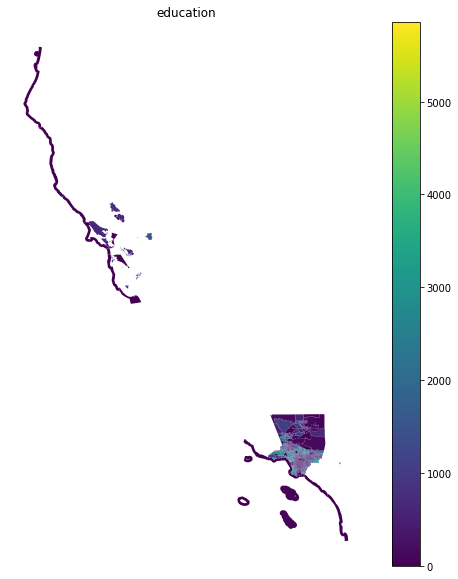

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])
egla18.plot(column="total", 
               ax=ax, legend=True);
ax.axis('off');
plt.title("education");

# income

In [ ]:
censusdata.search('acs5', 2018, 'concept', 'income')

[('B05010_001E',
  'RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY NATIVITY OF CHILDREN UNDER 18 YEARS IN FAMILIES AND SUBFAMILIES BY LIVING ARRANGEMENTS AND NATIVITY OF PARENTS',
  'Estimate!!Total'),
 ('B05010_002E',
  'RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY NATIVITY OF CHILDREN UNDER 18 YEARS IN FAMILIES AND SUBFAMILIES BY LIVING ARRANGEMENTS AND NATIVITY OF PARENTS',
  'Estimate!!Total!!Under 1.00'),
 ('B05010_003E',
  'RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY NATIVITY OF CHILDREN UNDER 18 YEARS IN FAMILIES AND SUBFAMILIES BY LIVING ARRANGEMENTS AND NATIVITY OF PARENTS',
  'Estimate!!Total!!Under 1.00!!Living with two parents'),
 ('B05010_004E',
  'RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY NATIVITY OF CHILDREN UNDER 18 YEARS IN FAMILIES AND SUBFAMILIES BY LIVING ARRANGEMENTS AND NATIVITY OF PARENTS',
  'Estimate!!Total!!Under 1.00!!Living with two parents!!Both parents native'),
 ('B05010_005E',
  'RATIO OF INCOME TO PO

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B19013'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B19013_001E  | MEDIAN HOUSEHOLD INCOME IN THE | !! Estimate Median household income in the past 12 month | int  
-------------------------------------------------------------------------------------------------------------------


In [ ]:
income = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B19013_001E"])

In [ ]:
income["tract"] = income.index.astype(str).map(gettract)

In [ ]:
income

,B19013_001E,tract
"Census Tract 5433.21, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:543321",85465,543321
"Census Tract 5435.02, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:543502",63582,543502
"Census Tract 5501, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:550100",71133,550100
"Census Tract 5505, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:550500",84315,550500
"Census Tract 5510, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:551000",86068,551000
...,...,...
"Census Tract 6040.01, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:604001",67823,604001
"Census Tract 6040.02, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:604002",60274,604002
"Census Tract 6203.05, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:620305",127632,620305
"Census Tract 6209.04, Los Angeles County, California: Summary level: 140, state:06> county:037> tract:620904",177632,620904


In [ ]:
incomela18 = gla18.merge(income, left_on = "TRACTCE", right_on = "tract")


In [ ]:
incomela18["income"] = np.log(incomela18["B19013_001E"])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
incomela18

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,B19013_001E,tract,income
0,06,037,137504,06037137504,1375.04,Census Tract 1375.04,G5020,S,3837562,0,+34.1480383,-118.5720594,"POLYGON ((-118.58119 34.14318, -118.58099 34.1...",158500,137504,11.973510
1,06,037,138000,06037138000,1380,Census Tract 1380,G5020,S,4472196,0,+34.1488008,-118.5910495,"POLYGON ((-118.60573 34.14585, -118.60561 34.1...",128026,138000,11.759989
2,06,037,139200,06037139200,1392,Census Tract 1392,G5020,S,1152031,0,+34.1756961,-118.5246447,"POLYGON ((-118.53082 34.18024, -118.52952 34.1...",67420,139200,11.118697
3,06,037,143200,06037143200,1432,Census Tract 1432,G5020,S,957093,0,+34.1494399,-118.3720618,"POLYGON ((-118.37899 34.15409, -118.37888 34.1...",74063,143200,11.212671
4,06,037,143300,06037143300,1433,Census Tract 1433,G5020,S,1649223,5619,+34.1521830,-118.3866139,"POLYGON ((-118.39648 34.15761, -118.39538 34.1...",87125,143300,11.375099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,06,037,910805,06037910805,9108.05,Census Tract 9108.05,G5020,S,110063439,87717,+34.4705186,-118.2228302,"POLYGON ((-118.33990 34.43616, -118.33925 34.4...",111618,910805,11.622838
2454,06,037,189600,06037189600,1896,Census Tract 1896,G5020,S,1082948,0,+34.1113467,-118.3297772,"POLYGON ((-118.33698 34.10837, -118.33694 34.1...",70109,189600,11.157806
2455,06,037,189400,06037189400,1894,Census Tract 1894,G5020,S,1446823,0,+34.1200812,-118.3211428,"POLYGON ((-118.32676 34.11112, -118.32674 34.1...",159609,189400,11.980482
2456,06,037,430724,06037430724,4307.24,Census Tract 4307.24,G5020,S,579901,0,+34.1270540,-118.0591184,"POLYGON ((-118.06770 34.12431, -118.06772 34.1...",54868,430724,10.912686


In [ ]:
county

,OBJECTID,ZIPCODE,ZIP,TOOLTIP,NLA_URL,geometry
0,1,90001,90001,Zip Code: 90001,navigatela/reports/zipcode_county_report.cfm?p...,"POLYGON ((-118.24338 33.98924, -118.24348 33.9..."
1,2,90002,90002,Zip Code: 90002,navigatela/reports/zipcode_county_report.cfm?p...,"POLYGON ((-118.23431 33.96101, -118.23442 33.9..."
2,3,90003,90003,Zip Code: 90003,navigatela/reports/zipcode_county_report.cfm?p...,"POLYGON ((-118.28285 33.97597, -118.28285 33.9..."
3,4,90004,90004,Zip Code: 90004,navigatela/reports/zipcode_county_report.cfm?p...,"POLYGON ((-118.28410 34.08349, -118.28438 34.0..."
4,5,90005,90005,Zip Code: 90005,navigatela/reports/zipcode_county_report.cfm?p...,"MULTIPOLYGON (((-118.33652 34.06190, -118.3367..."
...,...,...,...,...,...,...
306,307,93552,93552,Zip Code: 93552,navigatela/reports/zipcode_county_report.cfm?p...,"POLYGON ((-117.98740 34.66074, -117.98780 34.6..."
307,308,93553,93553,Zip Code: 93553,navigatela/reports/zipcode_county_report.cfm?p...,"POLYGON ((-117.88784 34.53628, -117.89155 34.5..."
308,309,93563,93563,Zip Code: 93563,navigatela/reports/zipcode_county_report.cfm?p...,"POLYGON ((-117.86059 34.47349, -117.86169 34.4..."
309,310,93591,93591,Zip Code: 93591,navigatela/reports/zipcode_county_report.cfm?p...,"POLYGON ((-117.92409 34.66075, -117.92428 34.6..."


# **HW9**

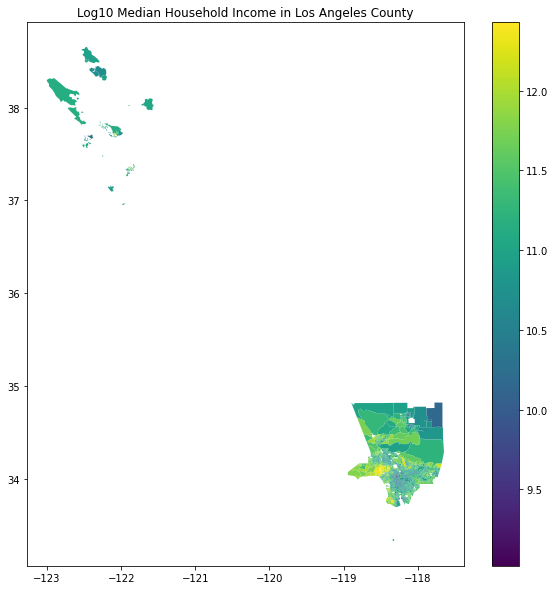

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])

incomela18.plot(column="income", ax=ax, legend=True);
ax.axis('on');
plt.title("Log10 Median Household Income in Los Angeles County");

The figure above is the Log10 Median Household Income in Los Angeles County. However, it is hard to see the location and the details. 

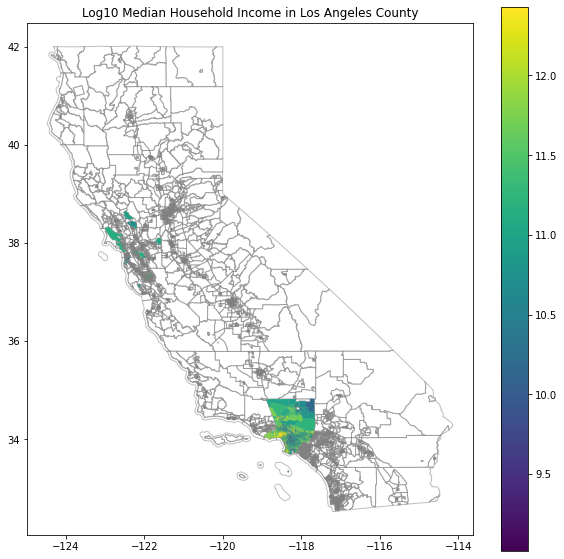

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])

gla18.plot(color="None", edgecolor='grey', ax=ax, alpha = 0.5)
incomela18.plot(column="income", ax=ax, legend=True);
ax.axis('on');
plt.title("Log10 Median Household Income in Los Angeles County");

I have used California state map as the base map. It could help the reader understand the location of LA county. But it is still hard to see the income distribution. 

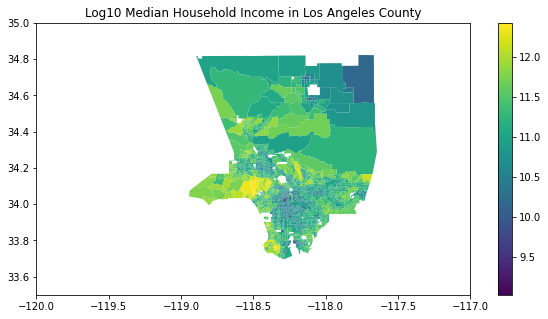

In [ ]:
fig, ax = plt.subplots(figsize=[10, 5])

incomela18.plot(column="income", ax=ax, legend=True);
ax.axis('on');
plt.title("Log10 Median Household Income in Los Angeles County");
ax.set_xlim(-120, -117)
ax.set_ylim(33.5, 35);

I  narrowed the income distribution map and it shows that the northeast of LA county has the lowest median household income, and the southwest of LA county has the highest median household income. 